In [2]:
# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice


In [357]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np


In [358]:


# Define Sampling Rate or Frequency in Hz
srIvory = 44100
srLazy = 44100
srCrazy = 44100


# Record duration in seconds
duration = 5



In [359]:
# # Start audio recording
# recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# # Record audio for the given duration
# print("recording...............")
# sd.wait()

# # Write it to a file
# write("lazydog.wav",sr,recording)

In [360]:
# # Start audio recording
# recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# # Record audio for the given duration
# print("recording...............")
# sd.wait()

# # Write it to a file
# write("ivorybuckles.wav",sr,recording)

In [361]:
# # Start audio recording
# test = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# # Record audio for the given duration
# print("recording...............")
# sd.wait()

# # Write it to a file
# write("testSound.wav",sr,test)

In [362]:
# Look at the discrete number array we got from the audio

ivorybuckles, srIvory = librosa.load('ivorybuckles.wav')
print("recording shape", ivorybuckles.shape)
print("sampling rate", srIvory)

lazydog, srLazy = librosa.load('lazydog.wav')
print("recording shape", lazydog.shape)
print("sampling rate", srLazy)

crazyfredrick, srCrazy = librosa.load('crazyfredrick.wav')
print("recording shape", crazyfredrick.shape)
print("sampling rate", srCrazy)

recording shape (110250,)
sampling rate 22050
recording shape (110250,)
sampling rate 22050
recording shape (110250,)
sampling rate 22050


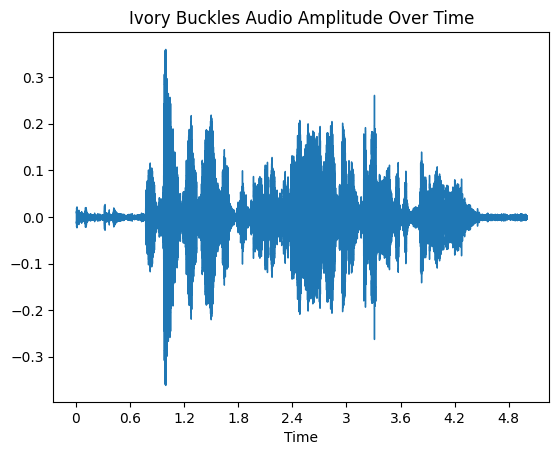

<Figure size 500x500 with 0 Axes>

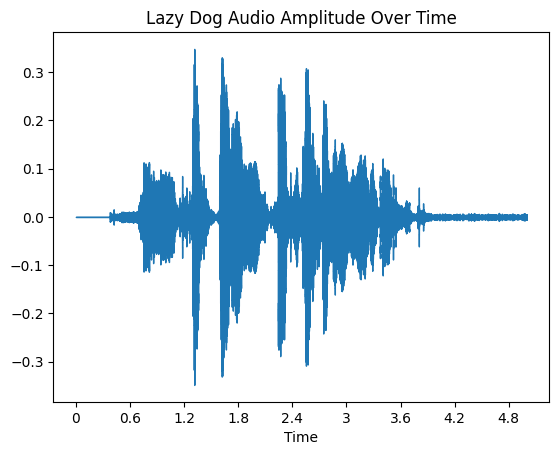

<Figure size 500x500 with 0 Axes>

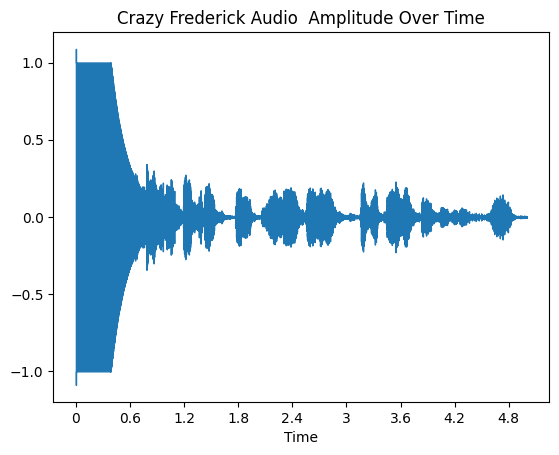

<Figure size 500x500 with 0 Axes>

In [363]:
# plt.figure(figsize=(14, 5))
fig, ax = plt.subplots()
librosa.display.waveshow(ivorybuckles, sr=srIvory, ax=ax)
ax.set(title='Ivory Buckles Audio Amplitude Over Time')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

fig, ax = plt.subplots()
librosa.display.waveshow(lazydog, sr=srLazy, ax=ax)
ax.set(title='Lazy Dog Audio Amplitude Over Time')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

fig, ax = plt.subplots()
librosa.display.waveshow(crazyfredrick, sr=srCrazy, ax=ax)
ax.set(title='Crazy Frederick Audio  Amplitude Over Time')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

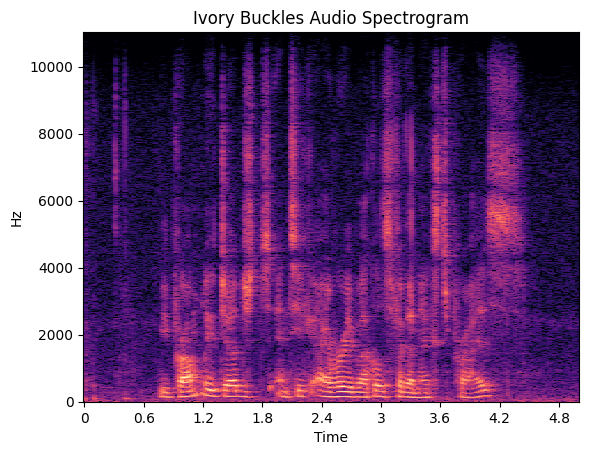

<Figure size 500x500 with 0 Axes>

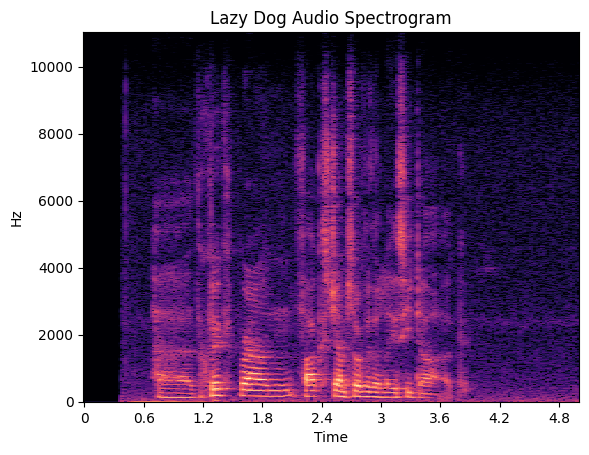

<Figure size 500x500 with 0 Axes>

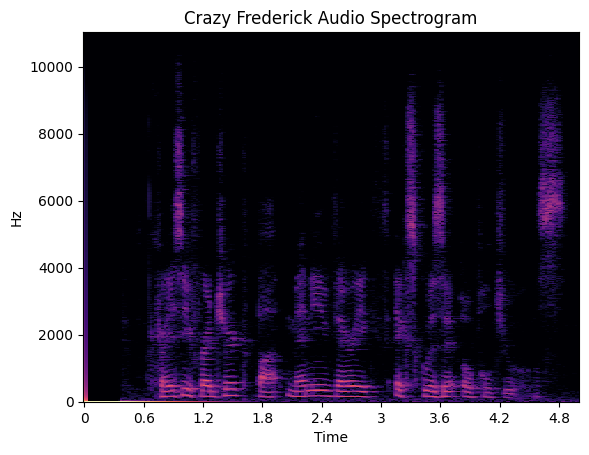

<Figure size 500x500 with 0 Axes>

In [364]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(ivorybuckles)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=srIvory, ax=ax)
ax.set(title='Ivory Buckles Audio Spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(lazydog)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=srLazy, ax=ax)
ax.set(title='Lazy Dog Audio Spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(crazyfredrick)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=srCrazy, ax=ax)
ax.set(title='Crazy Frederick Audio Spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))


In [365]:
# Play the audio
ipd.Audio(ivorybuckles, rate=srIvory) # load a NumPy array


In [366]:
ipd.Audio(crazyfredrick, rate=srCrazy) # load a NumPy array

In [367]:
ipd.Audio(lazydog, rate=srLazy) # load a NumPy array


In [368]:
one_ms = 44100//1000
ten_ms = 44100//100
hundred_ms = 44100//10
zero_ms = 0
avghead = 22

In [369]:
def createDelay(npArray, delayAmount):
    newArray = np.copy(npArray)
    newArray = np.roll(newArray, delayAmount) 
    for i in range(0, delayAmount):
        newArray[i] = 0
    print(newArray)
    return(newArray)
    
lazydogRightOne = createDelay(lazydog, one_ms)
lazydogRightTen = createDelay(lazydog, ten_ms)
lazydogRightHundred = createDelay(lazydog, hundred_ms)
lazydogRightZero = createDelay(lazydog, zero_ms)
lazydogRightAvg = createDelay(lazydog, avghead)

[ 0.          0.          0.         ... -0.00217619 -0.00139087
 -0.00098881]
[ 0.          0.          0.         ... -0.00149712 -0.00141416
  0.00044559]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.8661909e-06
 -3.9789971e-04 -4.4685008e-04]
[-1.0907650e-05 -1.6629696e-05 -1.4692545e-05 ... -3.5195528e-03
 -3.9889999e-03 -4.3972712e-03]
[ 0.          0.          0.         ... -0.00406747 -0.00321177
 -0.00266874]


In [370]:
def writeDelayWav(filename, left, right):
    # A 2D array where the left and right tones are contained in their respective rows
    
    #tone_y_stereo=np.vstack((toneLeft_y, toneRight_y))
    tone_y_stereo=np.vstack((left, right))
    
    # Reshape 2D array so that the left and right tones are contained in their respective columns
    tone_y_stereo=tone_y_stereo.transpose()
    
    # Produce an audio file that contains stereo sound
    wavfile.write(filename, srLazy, tone_y_stereo)

In [371]:
writeDelayWav('teamColwellHu-stereosoundfile-1ms.wav', lazydog, lazydogRightOne)
writeDelayWav('teamColwellHu-stereosoundfile-10ms.wav', lazydog, lazydogRightTen)
writeDelayWav('teamColwellHu-stereosoundfile-100ms.wav', lazydog, lazydogRightHundred)
writeDelayWav('teamColwellHu-stereosoundfile-0ms.wav', lazydog, lazydogRightZero)
writeDelayWav('teamColwellHu-stereosoundfile-avgms.wav', lazydog, lazydogRightAvg)

In [372]:
lazyDogDelayOne, srLazy = librosa.load('teamColwellHu-stereosoundfile-1ms.wav')
lazyDogDelayTen, srLazy = librosa.load('teamColwellHu-stereosoundfile-10ms.wav')
lazyDogDelayHundred, srLazy = librosa.load('teamColwellHu-stereosoundfile-100ms.wav')
lazyDogDelayZero, srLazy = librosa.load('teamColwellHu-stereosoundfile-0ms.wav')
lazyDogDelayAvg, srLazy = librosa.load('teamColwellHu-stereosoundfile-avgms.wav')



In [373]:
ipd.Audio(lazyDogDelayOne, rate=srLazy) # load a NumPy array



In [374]:
ipd.Audio(lazyDogDelayTen, rate=srLazy) # load a NumPy array


In [375]:
ipd.Audio(lazyDogDelayHundred, rate=srLazy) # load a NumPy array


In [376]:
ipd.Audio(lazyDogDelayZero, rate=srLazy) # load a NumPy array


In [377]:
ipd.Audio(lazyDogDelayAvg, rate=srLazy) # load a NumPy array


In [378]:
lazydogRightOne = createDelay(lazydog, one_ms)
lazydogRightTen = createDelay(lazydog, ten_ms)
lazydogRightHundred = createDelay(lazydog, hundred_ms)
lazydogRightZero = createDelay(lazydog, zero_ms)
lazydogRightAvg = createDelay(lazydog, avghead)

def createAttenuation(npArray):
    new1 = npArray * 0.70710678118 #1/sqrt(2), -1.5dB
    new2 = npArray * 0.5 #-3dB
    new3 = npArray * 0.25 #-6dB
    return npArray, new1, new2, new3
    
#1.5dB = sqrt2
#3.0dB = 2
#-6.0dB = 1/4
    
attenuateOne = createAttenuation(lazydogRightOne)
attenuateTen = createAttenuation(lazydogRightTen)
attenuateHundred = createAttenuation(lazydogRightHundred)
attenuateZero = createAttenuation(lazydogRightZero)
attenuateAvg = createAttenuation(lazydogRightAvg)

attenuateZero

[ 0.          0.          0.         ... -0.00217619 -0.00139087
 -0.00098881]
[ 0.          0.          0.         ... -0.00149712 -0.00141416
  0.00044559]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.8661909e-06
 -3.9789971e-04 -4.4685008e-04]
[-1.0907650e-05 -1.6629696e-05 -1.4692545e-05 ... -3.5195528e-03
 -3.9889999e-03 -4.3972712e-03]
[ 0.          0.          0.         ... -0.00406747 -0.00321177
 -0.00266874]


(array([-1.0907650e-05, -1.6629696e-05, -1.4692545e-05, ...,
        -3.5195528e-03, -3.9889999e-03, -4.3972712e-03], dtype=float32),
 array([-7.7128734e-06, -1.1758971e-05, -1.0389198e-05, ...,
        -2.4886995e-03, -2.8206487e-03, -3.1093403e-03], dtype=float32),
 array([-5.4538250e-06, -8.3148479e-06, -7.3462725e-06, ...,
        -1.7597764e-03, -1.9944999e-03, -2.1986356e-03], dtype=float32),
 array([-2.7269125e-06, -4.1574240e-06, -3.6731362e-06, ...,
        -8.7988819e-04, -9.9724997e-04, -1.0993178e-03], dtype=float32))

In [379]:
def writeDelayWavWithAtten(filename, npArrayofArray):

    attenuateFileName = np.array(['-zero','-neg1_5', '-neg3', '-neg6'])
    
    for i in range(0,4):
        writeDelayWav(filename + attenuateFileName[i] + '.wav', lazydog, npArrayofArray[i])

#writeDelayWavWithAtten('teamColwellHu-stereosoundfile-1ms', attenuateOne)
#writeDelayWavWithAtten('teamColwellHu-stereosoundfile-10ms', attenuateTen)
#writeDelayWavWithAtten('teamColwellHu-stereosoundfile-100ms', attenuateHundred)
writeDelayWavWithAtten('teamColwellHu-stereosoundfile-0ms', attenuateZero)
writeDelayWavWithAtten('teamColwellHu-stereosoundfile-avgms', attenuateAvg)



In [380]:
lazyDogDelayZeroAtten0, srLazy = librosa.load('teamColwellHu-stereosoundfile-0ms-zero.wav')
lazyDogDelayZeroAtten1_5, srLazy = librosa.load('teamColwellHu-stereosoundfile-0ms-neg1_5.wav')
lazyDogDelayZeroAtten3, srLazy = librosa.load('teamColwellHu-stereosoundfile-0ms-neg3.wav')
lazyDogDelayZeroAtten6, srLazy = librosa.load('teamColwellHu-stereosoundfile-0ms-neg6.wav')

lazyDogDelayAvgAtten0, srLazy = librosa.load('teamColwellHu-stereosoundfile-avgms-zero.wav')
lazyDogDelayAvgAtten1_5, srLazy = librosa.load('teamColwellHu-stereosoundfile-avgms-neg1_5.wav')
lazyDogDelayAvgAtten3, srLazy = librosa.load('teamColwellHu-stereosoundfile-avgms-neg3.wav')
lazyDogDelayAvgAtten6, srLazy = librosa.load('teamColwellHu-stereosoundfile-avgms-neg6.wav')




In [381]:
ipd.Audio(lazyDogDelayZeroAtten0, rate=srLazy) # load a NumPy array


In [382]:
ipd.Audio(lazyDogDelayZeroAtten1_5, rate=srLazy) # load a NumPy array


In [383]:
ipd.Audio(lazyDogDelayZeroAtten3, rate=srLazy) # load a NumPy array


In [384]:
ipd.Audio(lazyDogDelayZeroAtten6, rate=srLazy) # load a NumPy array


In [385]:
ipd.Audio(lazyDogDelayAvgAtten0, rate=srLazy) # load a NumPy array


In [386]:
ipd.Audio(lazyDogDelayAvgAtten1_5, rate=srLazy) # load a NumPy array


In [387]:
ipd.Audio(lazyDogDelayAvgAtten3, rate=srLazy) # load a NumPy array


In [388]:
ipd.Audio(lazyDogDelayAvgAtten6, rate=srLazy) # load a NumPy array
